- 重要参数
    - criterion
    - random_state & splitter
- 剪枝参数
    - max depth
    - min_samples_leaf & min_samples_split
    - max_features & min_impurity_decrease
- 目标权重参数
    - class_weight & min_weight_fraction_leaf
- 重要属性和接口
    - apply
    - predict

# criterion

In [1]:
# 1.导入算法库和模块
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
# 2.探索数据
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.data.shape

(178, 13)

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
# 3.区分训练集测试集
X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target,test_size=0.3)

In [10]:
X_train.shape

(124, 13)

In [11]:
X_test.shape

(54, 13)

In [12]:
# 4.建立模型
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, Y_train)
score = clf.score(X_test,Y_test)

score

0.9074074074074074

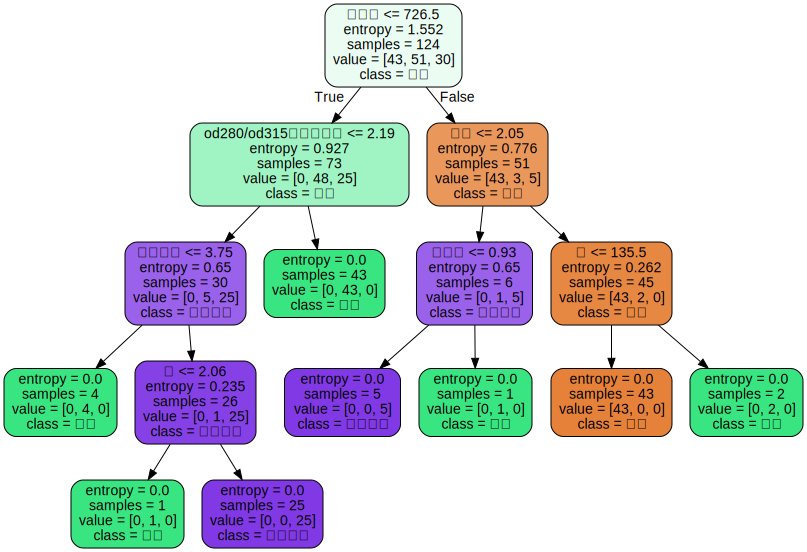

In [13]:
# 5.画出一棵树
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=feature_name,
                                class_names=["琴酒","雪莉","贝尔摩德"],
                                filled=True,
                                rounded=True
                                )
graph = graphviz.Source(dot_data)
graph


In [14]:
# 6.探索决策树
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.031767938735223225),
 ('灰的碱性', 0.0),
 ('镁', 0.061322516986067235),
 ('总酚', 0.12413929349462376),
 ('类黄酮', 0.020261434007772118),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.06953923130363737),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.25030795505941406),
 ('脯氨酸', 0.4426616304132623)]

In [15]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=24)
clf = clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)

score

0.9444444444444444

## random_state & splitter

In [16]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=24,
                                  splitter="random"
                                 )
clf = clf.fit(X_train,Y_train)
score = clf.score(X_test, Y_test)
score

0.8888888888888888

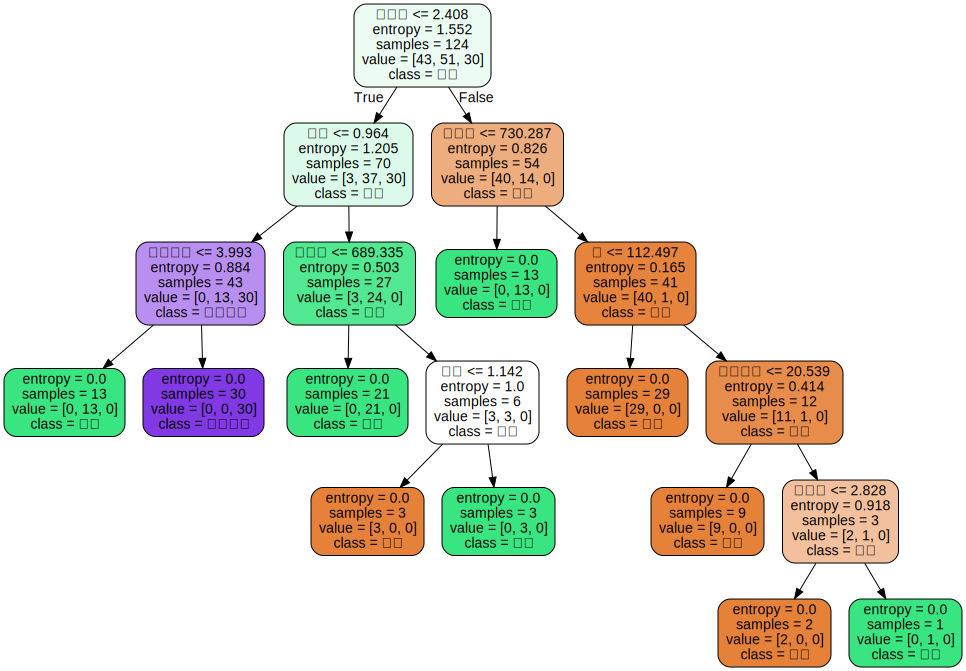

In [17]:
import graphviz
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_name,
                                class_names=["琴酒","雪莉","贝尔摩德"],
                                filled=True,
                                rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

## 剪枝参数

In [18]:
score_train = clf.score(X_train, Y_train)
score_train

1.0

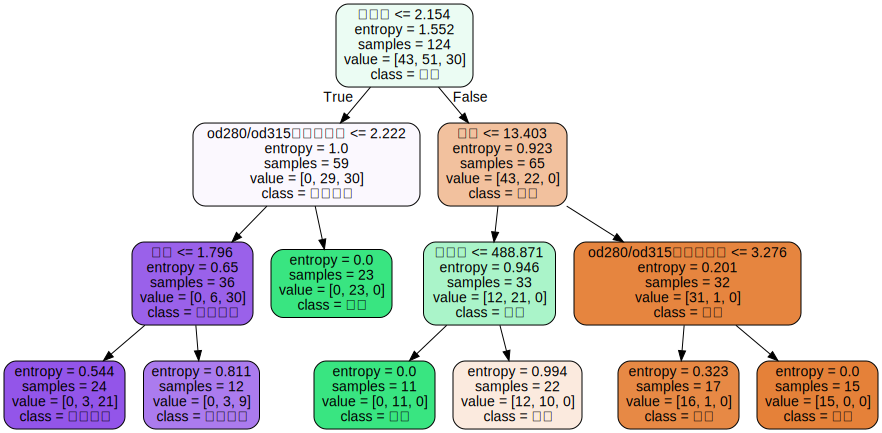

In [19]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=30,
                                  splitter="random",
                                  max_depth=3,
                                  min_samples_leaf=10,
                                  min_samples_split=10
                                    )
clf = clf.fit(X_train, Y_train)

dot_data = tree.export_graphviz(clf,
                                feature_names=feature_name,
                                filled=True,
                                class_names=["琴酒","雪莉","贝尔摩德"],
                                rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [20]:
clf.score(X_train, Y_train)

0.8629032258064516

In [21]:
clf.score(X_test, Y_test)

0.8888888888888888

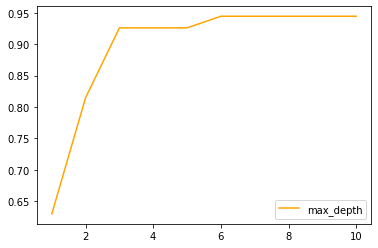

In [22]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1,
                                     criterion="entropy",
                                     random_state=30,
                                     splitter="random"
                                     )
    clf = clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    test.append(score)
plt.plot(range(1,11),test,color="orange",label="max_depth")
plt.legend()
plt.show()

## 目标权重参数

class_weight & min_weight_fraction_leaf

## 重要属性和接口

In [23]:
clf.apply(X_test)

array([13, 15, 15, 25, 25, 25, 17, 15, 11, 15, 19, 17, 11, 25, 15, 25, 15,
       25, 25, 25,  9, 11, 25, 25, 11, 25, 17, 11, 25, 11, 11, 11, 25, 11,
       15, 19, 25, 15, 15, 17, 25, 11, 15, 11, 11, 11, 13, 17, 11, 25, 15,
       15,  9, 11], dtype=int64)

In [24]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2,
       2, 2, 1, 1, 2, 0, 1, 1, 2, 2])